In [1]:
# 第一節提到的感知器，就算是複雜的處理，也可以由人工設定權重的方式來處理
# 而神經網路就可以解決這問題
# 一個神經網路可以分為(1)輸入層 (2)隱藏層 (3)輸出層

# 複習一下感知器
# y = { 0 (b + w1*x1 + w2*x2 <= 0)
#       1 (b + w1*x1 + w2*x2 > 0)}
# b可以把他想成是權重為b，輸入為1的訊號
# 這邊轉換一下算式
# y = h(b + w1x1 + w2x2)
# h(x) = {0 (x<=0)
#         1 (x>0) }
# 再轉換成 y = h(a)
# 其中a = b + w1x1 + w2x2

# 活化函數(activation function)

In [2]:
# 由上面提到的公式來看
# h()就是所謂的活化函數，它的功能就是把輸入訊號的總和(b + w1x1 + w2x2)轉換成輸出訊號!!!!!!!!!!!!
# h(x) = {0 (x<=0)
#         1 (x>0) }
# 這個函數是以臨界值為分界來轉換輸出訊號的函數，稱作 "階梯函數"(step function)
# 所以感知器這種演算法，也可以稱為是 "使用的是活化函數的階梯函數" 的模型
# 所以若把活化函數，從階梯函數改變成其他函數就可以開始了解神經網路在幹嘛囉!!!!

# 階梯函數

[False  True  True]
[0 1 1]


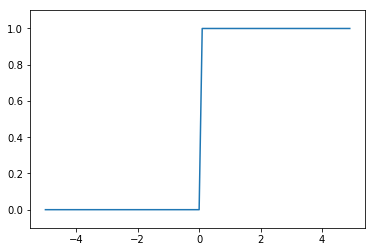

In [6]:
import numpy as np
import matplotlib.pylab as plt

# 用python來實作階梯函數，簡單!
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0
# 但因為之後都要使用numpy，上面那個函數無法傳遞numpy的陣列，所以修改成
def step_function(x):
    y = x > 0
    return y.astype(np.int) # 依照陣列布林值，轉換成0或1
x = np.array([-1.0, 1.0,2.0])
y = x > 0 # 這邊對numpy陣列值做不等式運算，等於對陣列裡所有元素做不等式運算(廣播的應用)
print(y)
y = y.astype(np.int) # False => 0, True => 1
print(y)
# 可再改寫成這樣
def step_function(x):
    return np.array(x > 0, dtype=np.int)
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
# 把階梯函數畫出來，是個以0為界線，輸出只有0和1而已
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

# sigmoid function

[ 0.26894142  0.73105858  0.88079708]


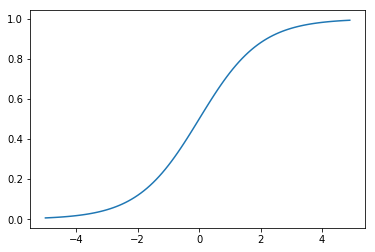

In [8]:
import numpy as np
import matplotlib.pylab as plt

# sigmoid函數的實現
# h(x) = 1 / (1 + exp(-x))
def sigmoid(x):
    return 1/(1 + np.exp(-x))
x= np.array([-1.0, 1.0, 2.0])
print(sigmoid(x))

# 照樣來畫個sigmoid的表示圖
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

# 相較於前面提到的階梯函數而言，sigmoid函數是平滑的曲線，換句話說，在感知器裡是傳遞著0和1兩個訊號，而sigmoid函數則是傳遞連續性的實數訊號
# 但輸出訊號都介於0~1

# ReLU function

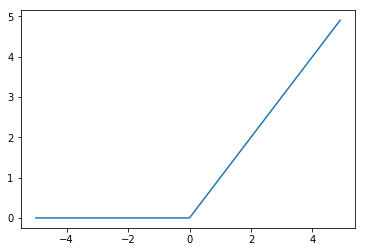

In [9]:
# 現在在神經網路中比較常使用的的是ReLU函數
# h(x) = { x (x > 0)
#          0 (x <= 0) }
# 也就是輸入x大於0就直接輸出x，小於0就輸出0
# 實現也很簡單
def relu(x):
    return np.maximum(0, x)
# 照樣來畫個ReLu的表示圖
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.show()

# 多維陣列運算

In [11]:
# 因為接下來的神經網路需要用到大量的陣列運算，先來熟悉一下numpy的陣列運算
# 首先看一下一維陣列
a = np.array([1,2,3,4])
print(a)
# a是幾維陣列
print(np.ndim(a))
# 觀察到a陣列的實際組成
print(a.shape)
# 二維陣列
b = np.array([[1,2],
             [3,4],
             [5,6]])
print(b)
# b是幾維陣列，二維又稱作矩陣!!
print(np.ndim(b))
# 觀察到a陣列的實際組成
print(b.shape)


[1 2 3 4]
1
(4,)
[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


In [17]:
# 來看矩陣的乘積!!!!!
a = np.array([[1,2,3],
             [4,5,6]])
print(a.shape)
b = np.array([[1,2],
             [3,4],
             [5,6]])
print(b.shape)
# 矩陣的乘積是有先後順序之分的!!!!!
# 先來看一下numpy怎麼做
print(np.dot(a,b)) # 變成一個2*2的矩陣 ==> [[22,28],[49,64]]
# 是如何變成這樣的，只有當前矩陣的行(column，也就是a的shape為3)等於後矩陣的列(row，也就是b的shape為3)，才可以運算矩陣的乘積
# 因為這邊很難畫圖，如果有興趣或不夠瞭解可以google一下!
print(np.dot(b,a)) # 可以看到兩個結果是不一樣的! => 3*3矩陣
# 若在矩陣運算時，前後兩矩陣元素數目不等會報錯喔!!

(2, 3)
(3, 2)
[[22 28]
 [49 64]]
[[ 9 12 15]
 [19 26 33]
 [29 40 51]]


In [24]:
# 接著來實作簡單的只有兩層隱藏層的神經網路
# 因為圖實在不好畫，可能之後再補...
X = np.array([1.0, 0.5]) # 為神經網路最初的輸入訊號
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]) # 為輸入訊號傳遞到下一層的權重值
B1 = np.array([0.1, 0.2, 0.3]) # 為神經網路第一層的偏權值(bias)
print(X.shape)
print(W1.shape) # 輸入有2個訊號，輸出為3個訊號 => shape(2,3)
print(B1.shape)

# 因此從輸入層到隱藏層第一層的神經網路計算後的結果為
A1 = np.dot(X,W1) + B1
print(A1)

# 但此時還沒有包含活化函數的部分，這邊先使用sigmoid函數
Z1 = sigmoid(A1)
print(Z1)

# 接著再做第一層到第二層的部分
W2 = np.array([[1.0, 0.4],[0.2, 0.5],[0.3, 0.6]])
B2 = np.array([0.1, 0.2])
print(Z1.shape)
print(W2.shape) # 輸入有3個訊號，輸出為2個訊號 => shape(3,2)
print(B2.shape)

# 第二層結果為
A2 = np.dot(Z1,W2) + B2
Z2 = sigmoid(A2)
print(Z2)

# 最後是第二層傳遞訊號到輸出層!!
# 執行方式跟前面幾乎一樣，只差在活化函數的不同!!
def identity_function(x):
    return x
W3 = np.array([[0.1, 0.3],[0.2, 0.4]])
B3 = np.array([0.1, 0.2])

# 最終輸出結果，如果以這個範例來說沒有必要定義identity_function這個函數，只是為了統一流程，所以都用function來處理
A3 = np.dot(Z2,W3) + B3
Y = identity_function(A3)
print(Y)
# 但輸出層所使用的活化函數，會因為要解決問題性質的不同而改變，例如:如果是回歸問題，就使用identity_function這種恆等函數
# 若是兩個分類的問題，可使用sigmoid函數，若是多分類問題則使用softmax函數等等



(2,)
(2, 3)
(3,)
[ 0.3  0.7  1.1]
[ 0.57444252  0.66818777  0.75026011]
(3,)
(3, 2)
(2,)
[ 0.7375277  0.7710107]
[ 0.32795491  0.72966259]


In [37]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
def identity_function(x):
    return x
# 這邊來做個統一執行處理的動作
# 在執行神經網路時，統一權重值W用大寫，其餘偏權值或其他都用小寫
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[1.0, 0.4],[0.2, 0.5],[0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3],[0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network
# 這邊用forawrd，是代表輸入往輸出的方向傳遞，之後還會介紹反向(backward)
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[ 0.32795491  0.72966259]


# 輸出層設計

In [36]:
# 前面有提到恆等函數identity_function比較適合用在回歸問題上
# 這邊要來談分類問題，這時候可能會使用softmax函數
# 定義如下 
# yk = exp(ak) / 總和(從i=1~i=n)(exp(ai))，這邊表示應該用sigma符號來表達
# 接著來看一行行執行softmax函數
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)
y = exp_a/sum_exp_a
print(y)
# 定義成函數
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y
# 現在這個函數雖然看起來使用沒有問題，但其實裡面計算了exp的指數，很容易發生溢位的問題，就是在計算的時候，該數值會超出位元組限制的範圍
# 所有要修改函數，有興趣可以去google softmax函數推導
# 簡而言之，就是在執行softmax函數時，分子分母同時加上(或減去)某個定數，不會影響結果也可以防止溢位問題!!
# 範例:，通常會減去輸入訊號的最大數值!
print("測試溢位問題")
a = np.array([1010,1000,990])
# np.exp(a) #array([ inf,  inf,  inf])
c = np.max(a)
print(a-c)
print(np.exp(a-c) / np.sum(np.exp(a-c)))
# 所以改善後的softmax函數
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y))
# 可以看到softmax函數的輸出值都介於0~1，並且總和為1，這是softmax函數非常重要的性質，因為這樣可以把輸出解釋為機率
# 以這個範例來看，可以解釋成有73.6%機率為第2類別，24.5%為第1類別，0.02%為第0類別

# 輸出層的神經元數量，會依照解決的問題有所不同，如果是要預測某影像是數字0~9的其中一個，輸出層就必須設定為10個，會依照想分類的類別數量制定

[  1.34985881  18.17414537  54.59815003]
74.1221542102
[ 0.01821127  0.24519181  0.73659691]
測試溢位問題
[  0 -10 -20]
[  9.99954600e-01   4.53978686e-05   2.06106005e-09]
[ 0.01821127  0.24519181  0.73659691]
1.0
